In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False


In [12]:
originle_df = pd.read_excel(r'd:\\上海兴业银行样本数据集.xlsx',header=0)

In [13]:
display(originle_df.info(),originle_df.describe().T)
originle_df.describe().T.to_excel('d:\\兴业造数_describe.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
id                100000 non-null int64
籍贯                99451 non-null object
性别                100000 non-null object
年龄                100000 non-null int64
婚姻状况              100000 non-null object
学历                100000 non-null object
开户日期              100000 non-null object
征信认定年收入           100000 non-null object
社会保障              100000 non-null int64
客户级信用额度           100000 non-null int64
美元账户额度            100000 non-null int64
CRM评级结果           100000 non-null object
客户评级结果            100000 non-null object
借记卡层级             100000 non-null object
附卡卡数              100000 non-null object
存款期限              100000 non-null object
是否为低保户            100000 non-null object
受否贫困户             100000 non-null object
行业                100000 non-null object
职业                100000 non-null object
零售潜在客户            100000 non-null object
理财产品风险等级          100000 non-null o

None

,count,mean,std,min,25%,50%,75%,max
id,100000.0,1.521605e+10,1.802710e+09,1.301330e+10,1.371971e+10,1.502166e+10,1.591638e+10,1.995741e+10
年龄,100000.0,2.608323e+01,1.391934e+01,-3.700000e+01,1.700000e+01,2.600000e+01,3.600000e+01,8.900000e+01
社会保障,100000.0,6.750000e-01,4.683772e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
客户级信用额度,100000.0,2.312500e+04,1.395032e+04,5.000000e+03,1.000000e+04,2.000000e+04,3.000000e+04,5.000000e+04
美元账户额度,100000.0,3.000000e-02,1.705881e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
贷款放款本金,100000.0,3.534412e+05,2.640042e+05,0.000000e+00,1.660368e+05,2.747520e+05,5.020992e+05,1.930978e+06
账户余额,100000.0,1.672901e+05,1.377390e+05,0.000000e+00,6.615300e+04,1.222215e+05,2.506245e+05,9.124900e+05
贷款期数,100000.0,3.200964e+01,8.379660e+00,0.000000e+00,2.600000e+01,3.200000e+01,3.800000e+01,7.000000e+01
剩余贷款本金,100000.0,2.498986e+05,8.035591e+04,0.000000e+00,1.985305e+05,2.667725e+05,3.085980e+05,5.197020e+05
购买金额_事件表,100000.0,4.009591e+04,2.013964e+04,0.000000e+00,2.575900e+04,3.860000e+04,5.308925e+04,1.328540e+05


(100000, 65)

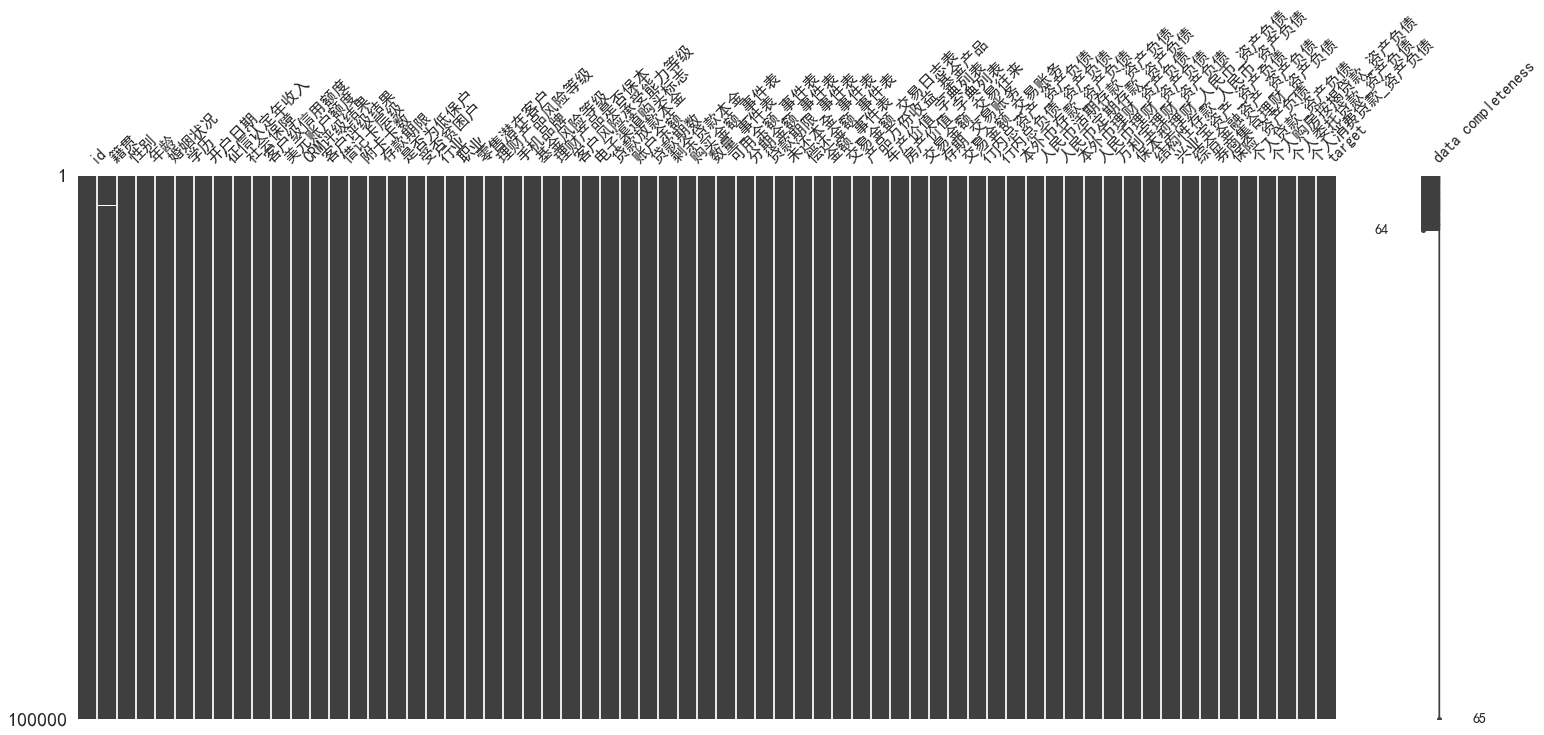

In [14]:
msno.matrix(originle_df,labels = True)
originle_df.shape

In [15]:
pandas_profiling.ProfileReport(originle_df)

Number of variables,65
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,49.6 MiB
Average record size in memory,520.0 B
Numeric,40
Categorical,22
Boolean,2
Date,0
Text (Unique),0
Rejected,1
